In [2]:
import tensorflow as tf
import glob, os, fnmatch
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, models, regularizers
from skimage import io, transform
from skimage.transform import rescale, resize
from PIL import Image


In [3]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [4]:
path1 = "/content/drive/My Drive/Trabalho/Treino"
path2 = "/content/drive/My Drive/Trabalho/Teste"

- Com mascara => formato .png
- Sem mascara => formato .jpg


In [5]:
c1 = os.listdir(path1)
c2 = os.listdir(path2)

exttrain = []
exttest = []

for e in c1:
    #a = [os.path.splitext(e)[1]]
    if fnmatch.fnmatch(e, '*.png'):
        exttrain.append(1)
    else:
        exttrain.append(0)

for e in c2:
    #a = [os.path.splitext(e)[1]]
    if fnmatch.fnmatch(e, '*.png'):
        exttest.append(1)
    else:
        exttest.append(0)

print(exttest)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [6]:
len(exttest)

10

In [7]:
img_train= []
img_test = []

Armazenando todas as Imagens de Treino


In [8]:
for filename in glob.glob(path1 + '/*.jpg'):
    print(filename)
    img = io.imread(filename)                
    resized = resize(img, (300,300,3))
    img_train.append(resized)  

/content/drive/My Drive/Trabalho/Treino/0256.jpg
/content/drive/My Drive/Trabalho/Treino/0137.jpg
/content/drive/My Drive/Trabalho/Treino/0139.jpg
/content/drive/My Drive/Trabalho/Treino/0293.jpg
/content/drive/My Drive/Trabalho/Treino/0146.jpg
/content/drive/My Drive/Trabalho/Treino/0391.jpg
/content/drive/My Drive/Trabalho/Treino/0147.jpg
/content/drive/My Drive/Trabalho/Treino/0456.jpg
/content/drive/My Drive/Trabalho/Treino/0136.jpg
/content/drive/My Drive/Trabalho/Treino/0453.jpg
/content/drive/My Drive/Trabalho/Treino/0219.jpg
/content/drive/My Drive/Trabalho/Treino/0141.jpg
/content/drive/My Drive/Trabalho/Treino/0148.jpg
/content/drive/My Drive/Trabalho/Treino/1604.jpg
/content/drive/My Drive/Trabalho/Treino/0454.jpg
/content/drive/My Drive/Trabalho/Treino/0289.jpg
/content/drive/My Drive/Trabalho/Treino/0477.jpg
/content/drive/My Drive/Trabalho/Treino/0135.jpg
/content/drive/My Drive/Trabalho/Treino/0230.jpg
/content/drive/My Drive/Trabalho/Treino/0244.jpg
/content/drive/My Dr

In [9]:
for filename in glob.glob(path1 + '/*.png'):
    print(filename)
    img = io.imread(filename)                
    resized = resize(img, (300,300,3))
    img_train.append(resized)  

/content/drive/My Drive/Trabalho/Treino/2577.png
/content/drive/My Drive/Trabalho/Treino/2591.png
/content/drive/My Drive/Trabalho/Treino/2659.png
/content/drive/My Drive/Trabalho/Treino/2642.png
/content/drive/My Drive/Trabalho/Treino/2716.png
/content/drive/My Drive/Trabalho/Treino/2396.png
/content/drive/My Drive/Trabalho/Treino/2979.png
/content/drive/My Drive/Trabalho/Treino/2580.png
/content/drive/My Drive/Trabalho/Treino/2399.png
/content/drive/My Drive/Trabalho/Treino/3159.png
/content/drive/My Drive/Trabalho/Treino/3289.png
/content/drive/My Drive/Trabalho/Treino/3328.png
/content/drive/My Drive/Trabalho/Treino/3044.png
/content/drive/My Drive/Trabalho/Treino/3885.png
/content/drive/My Drive/Trabalho/Treino/3838.png
/content/drive/My Drive/Trabalho/Treino/4829.png
/content/drive/My Drive/Trabalho/Treino/3845.png
/content/drive/My Drive/Trabalho/Treino/3881.png
/content/drive/My Drive/Trabalho/Treino/3796.png
/content/drive/My Drive/Trabalho/Treino/4895.png
/content/drive/My Dr

In [10]:
len(img_train)

90

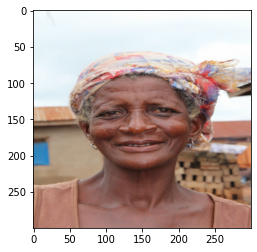

In [11]:
plt.imshow(img_train[20])

Armazenando todas as Imagens de Teste

In [12]:
for filename in glob.glob(path2 + '/*.jpg'):
    img2 = io.imread(filename)                
    resized2 = resize(img2, (300,300,3))
    img_test.append(resized2)  

In [13]:
for filename in glob.glob(path2 + '/*.png'):
    img2 = io.imread(filename)
    resized2 = resize(img2, (300,300,3))
    img_test.append(resized2)  

In [14]:
len(img_test)

10

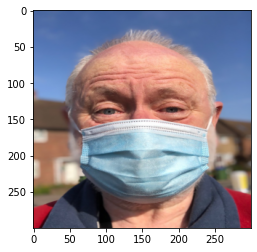

In [15]:
plt.imshow(img_test[9])

CNN

Total de Imagens = 100

90% = Treino 

10% = Teste

In [19]:
train_images = np.zeros((90, 300, 300, 3))
test_images = np.zeros((10, 300, 300, 3))
train_labels = np.zeros((90, 1))
test_labels = np.zeros((10, 1))

In [20]:
id_treino = 0
for i in range(len(img_train)):

    train_images[id_treino,:,:,:] = img_train[i]

    if exttrain[i] == 1:
        train_labels[id_treino] = 1
    else:
        train_labels[id_treino] = 0

    id_treino += 1

In [21]:
id_test = 0
for i in range(len(img_test)):

    test_images[id_test,:,:,:] = img_test[i]

    if exttest[i] == 1:
        test_labels[id_test] = 1
    else:
        test_labels[id_test] = 0
        
    id_test += 1

In [22]:
test_labels

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

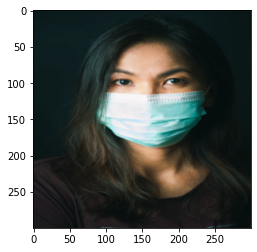

In [28]:
plt.imshow(test_images[8])

In [149]:
 #Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

In [115]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size =(3, 3), activation='relu', input_shape = (300, 300, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(128, kernel_size = (7, 7), activation='relu'))

model.add(layers.Dropout(0.5)) #novo
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))) #adicionado regularizacao
model.add(layers.Dense(2)) #corrigido

In [116]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [117]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 145, 145, 64)      51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 66, 66, 128)       401536    
_________________________________________________________________
dropout_6 (Dropout)          (None, 66, 66, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 557568)          

In [118]:
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
3/3 [==============================] - 0s 129ms/step - loss: 24.1472 - accuracy: 0.5222 - val_loss: 1.2431 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 82ms/step - loss: 1.1385 - accuracy: 0.5889 - val_loss: 2.6104 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 79ms/step - loss: 1.9210 - accuracy: 0.4778 - val_loss: 1.3501 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 83ms/step - loss: 2.0047 - accuracy: 0.4556 - val_loss: 1.4757 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 83ms/step - loss: 1.5593 - accuracy: 0.4556 - val_loss: 1.5343 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 81ms/step - loss: 1.5436 - accuracy: 0.5000 - val_loss: 1.5696 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 84ms/step - loss: 1.6060 - accuracy: 0.4889 - val_loss: 1.5886 - val_accuracy: 0.5000
Epoch 8/100
3/3 [=

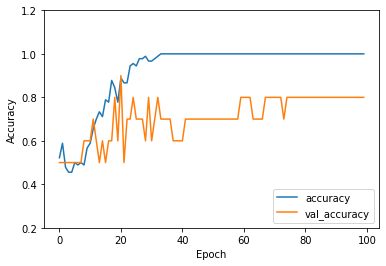

In [119]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1.2])
plt.legend(loc='lower right')

In [120]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

1/1 - 0s - loss: 1.5354 - accuracy: 0.8000
0.800000011920929


In [121]:
class_names = ['with mask', 'without mask']

In [123]:
#verificar acuracia por classe
import numpy as np
saidas = model.predict(test_images)
labels_out = np.argmax(saidas, axis=1)
pcts = []
for classe in range(0,2):
    indices = np.where(test_labels == classe)[0]
    corretos = np.where(labels_out[indices] == classe)[0]
    porcentagem = len(corretos) / len(indices)
    pcts.append(porcentagem * 100)
    
print('Porcentagens')
for i in range(0,2):
    print('%s -> %.2f %%' %(class_names[i],pcts[i]))

Porcentagens
with mask -> 80.00 %
without mask -> 80.00 %
